In [68]:
# Data handling libraries
import numpy as np
import pandas as pd

# Data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Data transformation Libraries
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

# Machine Learning Model Libraries
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Data Evaluation Libraries
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Clustering Libraries
from sklearn.cluster import KMeans, AgglomerativeClustering

#Filter Warnings
import warnings
warnings.filterwarnings('ignore')

In [69]:
# Importing the data into dataframe
df = pd.read_csv('data.csv', encoding='unicode_escape')

# Data Understanding

In [70]:
# Displaying first 5 rows
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [71]:
# Displaying the last 5 rows
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


# Features in the dataset

1. InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation. 
2. StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
3. Description: Product (item) name. Nominal.
4. Quantity: The quantities of each product (item) per transaction. Numeric.	
5. InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
6. UnitPrice: Unit price. Numeric, Product price per unit in sterling.
7. CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
8. Country: Country name. Nominal, the name of the country where each customer resides. 

In [72]:
# Number of rows and columns
df.shape

(541909, 8)

In [73]:
# Information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [74]:
# Datatypes of variables
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

1. 5 columns are object. 1 column is integer and 2 columns are float.
2. InvoiceDate should be changed to Datetime.

In [75]:
# Different columns in the dataset
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

# Data Preprocessing

In [76]:
# Check for null values
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

1. CustomerID has 135080 missing values 
2. Description has 1454 missing values

In [77]:
# Since project is customer segmentation based on customer behaviour, null values of customerID we can delete it.
df = df.dropna(subset=['CustomerID'])

In [78]:
# Replacing null values of description with value 'unknown'
df['Description'] = df['Description'].fillna('Unknown')

In [79]:
# Check for null values again
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [80]:
df.shape

(406829, 8)

In [81]:
# Check for duplicate values
df.duplicated().sum()

5225

There are 5225 duplicates values. We can delete them

In [82]:
# Dropping the duplicated values
df = df.drop_duplicates()

In [83]:
# Check for duplicate values
df.duplicated().sum()

0

In [84]:
# After droping duplicate values, check the shape
df.shape

(401604, 8)

In [85]:
# Convert InvoiceDate from object to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

#verify the InvoiceDate column
print(df.dtypes['InvoiceDate'])

datetime64[ns]


In [86]:
# Convert CustomerID from float to int format
df['CustomerID'] = df['CustomerID'].astype('int64')

# Exploratory Data Analysis

In [87]:
#Check for unique values
df.nunique()

InvoiceNo      22190
StockCode       3684
Description     3896
Quantity         436
InvoiceDate    20460
UnitPrice        620
CustomerID      4372
Country           37
dtype: int64

In [88]:
# Descrivtive statistics for numerical values
df.describe()

,Quantity,UnitPrice,CustomerID
count,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,15281.160818
std,250.283037,69.764035,1714.006089
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13939.000000
50%,5.000000,1.950000,15145.000000
75%,12.000000,3.750000,16784.000000
max,80995.000000,38970.000000,18287.000000


### Statistical Insights
1. In quantity, min value is negative, may be it is due to cancelled and returned products.
2. Unit price min value is 0, may be it is due to free item or discount price.

In [89]:
#Descriptive statistics for categorical values
df.describe(exclude=[np.number])

,InvoiceNo,StockCode,Description,InvoiceDate,Country
count,401604,401604,401604,401604,401604
unique,22190,3684,3896,20460,37
top,576339,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2011-11-14 15:27:00,United Kingdom
freq,542,2065,2058,543,356728
first,NaN,NaN,NaN,2010-12-01 08:26:00,NaN
last,NaN,NaN,NaN,2011-12-09 12:50:00,NaN


In [90]:
df['InvoiceNo'].value_counts()

576339     542
579196     533
580727     529
578270     442
573576     435
          ... 
C560912      1
560913       1
560917       1
572879       1
553049       1
Name: InvoiceNo, Length: 22190, dtype: int64

In [91]:
df['StockCode'].value_counts()

85123A    2065
22423     1894
85099B    1659
47566     1409
84879     1405
          ... 
90104        1
90135        1
90027D       1
90027A       1
84746        1
Name: StockCode, Length: 3684, dtype: int64

In [92]:
df['Description'].value_counts()

WHITE HANGING HEART T-LIGHT HOLDER    2058
REGENCY CAKESTAND 3 TIER              1894
JUMBO BAG RED RETROSPOT               1659
PARTY BUNTING                         1409
ASSORTED COLOUR BIRD ORNAMENT         1405
                                      ... 
PINK/WHITE GLASS DEMI CHOKER             1
 I LOVE LONDON MINI RUCKSACK             1
SET 36 COLOURING PENCILS DOILEY          1
SET 12 COLOURING PENCILS DOILEY          1
PEARL AND CHERRY QUARTZ BRACLET          1
Name: Description, Length: 3896, dtype: int64

In [93]:
# Displaying unitprice less than zero
df[df['UnitPrice'] <= 0] 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,2010-12-05 14:02:00,0.0,12647,Germany
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,2010-12-16 14:36:00,0.0,16560,United Kingdom
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,2010-12-21 13:45:00,0.0,14911,EIRE
47068,540372,22090,PAPER BUNTING RETROSPOT,24,2011-01-06 16:41:00,0.0,13081,United Kingdom
47070,540372,22553,PLASTERS IN TIN SKULLS,24,2011-01-06 16:41:00,0.0,13081,United Kingdom
56674,541109,22168,ORGANISER WOOD ANTIQUE WHITE,1,2011-01-13 15:10:00,0.0,15107,United Kingdom
86789,543599,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,16,2011-02-10 13:08:00,0.0,17560,United Kingdom
130188,547417,22062,CERAMIC BOWL WITH LOVE HEART DESIGN,36,2011-03-23 10:25:00,0.0,13239,United Kingdom
139453,548318,22055,MINI CAKE STAND HANGING STRAWBERY,5,2011-03-30 12:45:00,0.0,13113,United Kingdom
145208,548871,22162,HEART GARLAND RUSTIC PADDED,2,2011-04-04 14:42:00,0.0,14410,United Kingdom


In [94]:
# Displaying quantity less than zero
df[df['Quantity'] <= 0] 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315,United Kingdom


In [95]:
# Removing the records with unit price of zero and cancelled products
df = df[(df['UnitPrice'] > 0)]
df = df[(df['Quantity'] > 0)]

## Multivariate Analysis

<Axes: >

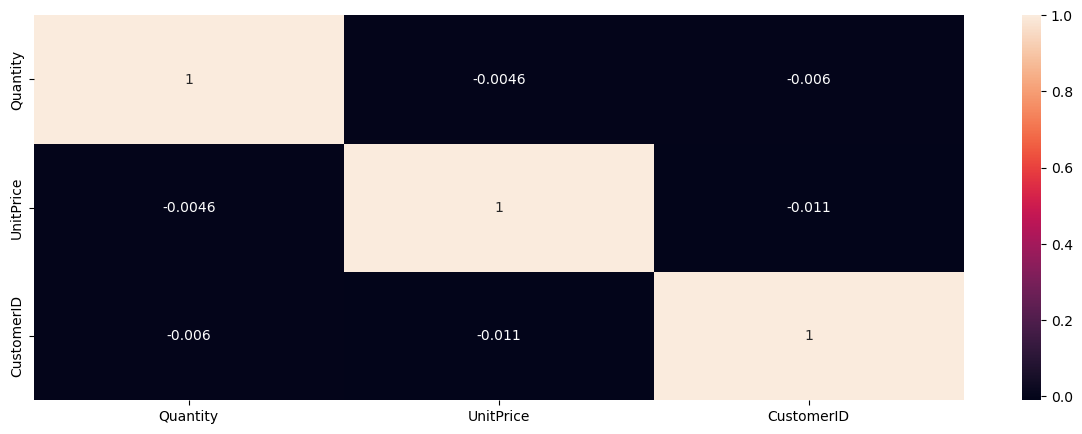

In [96]:
# check correlation between variables
corr = df.corr()
f, ax = plt.subplots(figsize=(15,5))
sns.heatmap(corr, annot=True)

In [97]:
# saving the cleaned data to explore EDA in tableau
#df.to_csv('Online Retail Customer Segmentation.csv', index=False)

# Feature Engineering

In [98]:
# Creating separate columns for year, month, day, hour for further time series analysis
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['Day'] = df['InvoiceDate'].dt.dayofweek
df['Day_Name'] = df['InvoiceDate'].dt.day_name()
df['Hour'] = df['InvoiceDate'].dt.hour
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,Day_Name,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010,12,2,Wednesday,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,2,Wednesday,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010,12,2,Wednesday,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,2,Wednesday,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,2,Wednesday,8


In [99]:
# Creating a column total amount spent
df['Total_Amount'] = df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,Day_Name,Hour,Total_Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010,12,2,Wednesday,8,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,2,Wednesday,8,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010,12,2,Wednesday,8,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,2,Wednesday,8,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,2,Wednesday,8,20.34


          Country  CustomerID
0  United Kingdom        3920
1         Germany          94
2          France          87
3           Spain          30
4         Belgium          25
5     Switzerland          21
6        Portugal          19
7           Italy          14
8         Finland          12
9         Austria          11


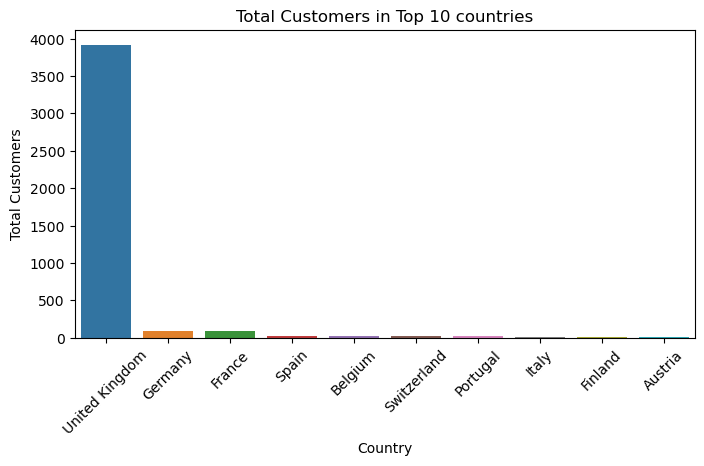

In [100]:
# Top 10 customers by countries
top_10_customers_by_country = df.groupby('Country')['CustomerID'].nunique().sort_values(ascending = False).head(10).reset_index()
print(top_10_customers_by_country)

plt.figure(figsize=(8,4))
sns.barplot(data = top_10_customers_by_country, x = 'Country', y = 'CustomerID')
plt.ylabel('Total Customers')
plt.xlabel('Country')
plt.title('Total Customers in Top 10 countries')
plt.xticks(rotation=45)
plt.show()

          Country  Total_Amount
0  United Kingdom   7285024.644
1     Netherlands    285446.340
2            EIRE    265262.460
3         Germany    228678.400
4          France    208934.310
5       Australia    138453.810
6           Spain     61558.560
7     Switzerland     56443.950
8         Belgium     41196.340
9          Sweden     38367.830


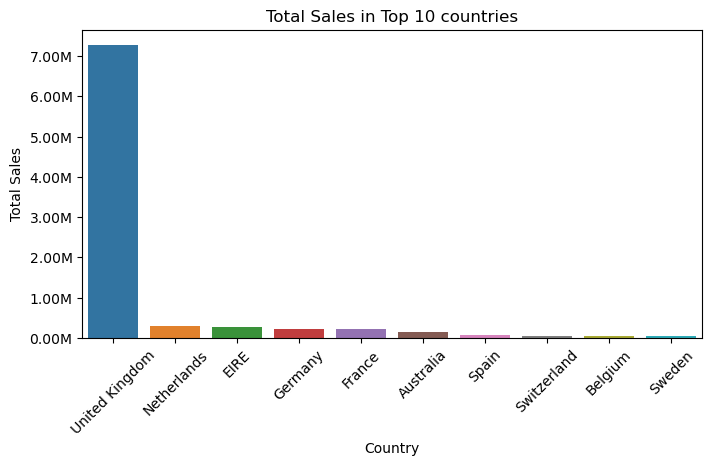

In [101]:
#top 10 countries with highest sales
top_10_country_sales = df.groupby('Country')['Total_Amount'].sum().sort_values(ascending = False).head(10).reset_index()
print(top_10_country_sales)

plt.figure(figsize=(8,4))
ax = sns.barplot(data=top_10_country_sales, x='Country', y='Total_Amount')
plt.ylabel('Total Sales')
plt.xlabel('Country')
plt.title('Total Sales in Top 10 countries')
plt.xticks(rotation=45)
ax.set_yticklabels(['{:.2f}M'.format(y / 1000000) for y in ax.get_yticks()])
plt.show()

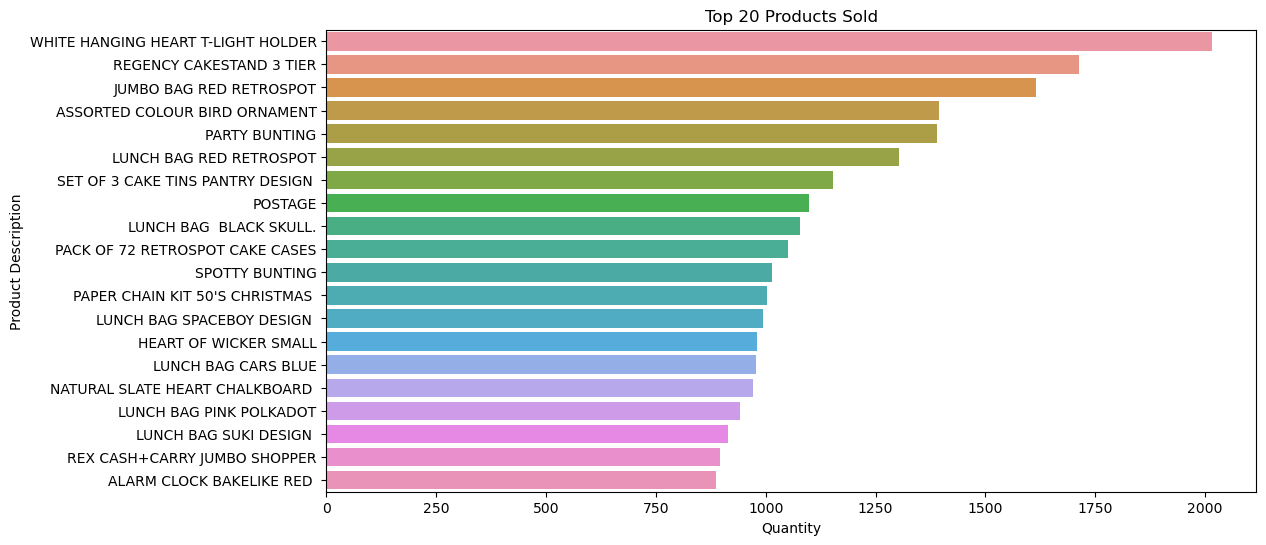

In [102]:
# Top 20 products sold

top_20_products = df['Description'].value_counts().head(20)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_20_products.values, y=top_20_products.index)
plt.title('Top 20 Products Sold')
plt.xlabel('Quantity')
plt.ylabel('Product Description')
plt.show()

   Year  Total Sales  Number Of Orders
0  2011  8316786.164            367022
1  2010   570422.730             25670


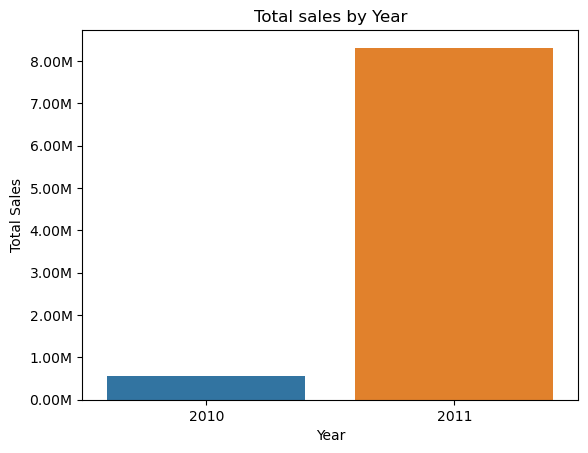

In [103]:
#top years with highest sales
top_years_sales = df.groupby(['Year']).agg({'Total_Amount': 'sum', 'InvoiceNo':'count'}).sort_values(by='Year', ascending = False).head(10).reset_index().rename(columns = {'Total_Amount':'Total Sales', 'InvoiceNo':'Number Of Orders'})
print(top_years_sales)
ax = sns.barplot(data=top_years_sales, x='Year', y='Total Sales')
plt.title('Total sales by Year')
plt.xlabel('Year')
plt.ylabel('Total Sales')
ax.set_yticklabels(['{:.2f}M'.format(y / 1000000) for y in ax.get_yticks()])
plt.show()

   Year  Month  Total Sales  Number Of Orders
0  2011     11  1156205.610             63168
1  2011     10  1035642.450             48793
2  2011      9   950690.202             39669
3  2011      5   677355.150             28073
4  2011      6   660046.050             26926
5  2011      8   644051.040             26790
6  2011      7   598962.901             26580
7  2011      3   594081.760             26870
8  2010     12   570422.730             25670
9  2011      1   568101.310             20988


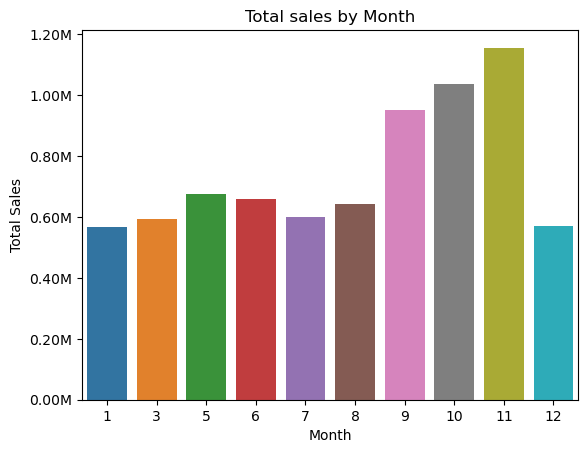

In [104]:
#top months with highest sales
top_months_sales = df.groupby(['Year','Month']).agg({'Total_Amount': 'sum', 'InvoiceNo':'count'}).rename(columns = {'Total_Amount':'Total Sales', 'InvoiceNo':'Number Of Orders'}).sort_values(by='Total Sales', ascending = False).head(10).reset_index()
print(top_months_sales)
ax = sns.barplot(data=top_months_sales, x='Month', y='Total Sales')
plt.title('Total sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
ax.set_yticklabels(['{:.2f}M'.format(y / 1000000) for y in ax.get_yticks()])
plt.show()

    Day_Name  Total Sales  Number Of Orders
0   Thursday  1973015.730             79243
1    Tuesday  1697733.801             65744
2  Wednesday  1584283.830             68040
3     Friday  1483080.811             54222
4     Monday  1363604.401             64231
5     Sunday   785490.321             61212


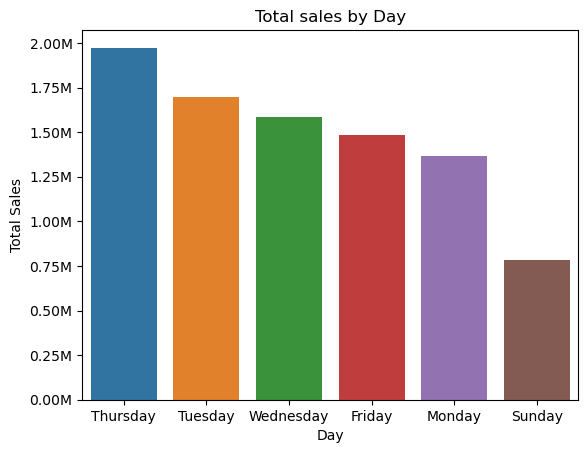

In [105]:
#top days of week with highest sales
top_day_sales = df.groupby(['Day_Name']).agg({'Total_Amount': 'sum', 'InvoiceNo':'count'}).rename(columns = {'Total_Amount':'Total Sales', 'InvoiceNo':'Number Of Orders'}).sort_values(by='Total Sales', ascending = False).head(10).reset_index()
print(top_day_sales)
ax = sns.barplot(data=top_day_sales, x='Day_Name', y='Total Sales')
plt.title('Total sales by Day')
plt.xlabel('Day')
plt.ylabel('Total Sales')
ax.set_yticklabels(['{:.2f}M'.format(y / 1000000) for y in ax.get_yticks()])
plt.show()

   Hour  Total Sales  Number Of Orders
0    12  1373695.390             70938
1    10  1259267.591             37773
2    13  1168724.200             63019
3    11  1101177.600             48365
4    14   991992.821             53251
5    15   963559.680             44790
6     9   842392.341             21927
7    16   467380.560             23715
8     8   281997.790              8687
9    17   233811.591             12941


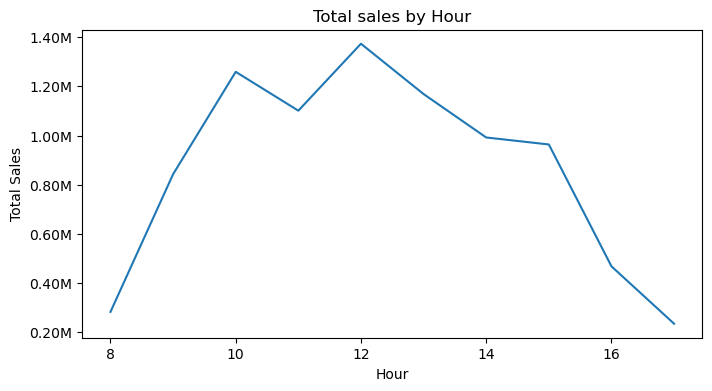

In [106]:
#top hours with highest sales
top_hour_sales = df.groupby(['Hour']).agg({'Total_Amount': 'sum', 'InvoiceNo':'count'}).rename(columns = {'Total_Amount':'Total Sales', 'InvoiceNo':'Number Of Orders'}).sort_values(by='Total Sales', ascending = False).head(10).reset_index()
print(top_hour_sales)
plt.figure(figsize=(8, 4))
ax = sns.lineplot(data=top_hour_sales, x='Hour', y='Total Sales')
plt.title('Total sales by Hour')
plt.xlabel('Hour')
plt.ylabel('Total Sales')
ax.set_yticklabels(['{:.2f}M'.format(y / 1000000) for y in ax.get_yticks()])
plt.show()

   CustomerID  Total Sales  Number Of Orders
0       17841     40519.84              7676
1       14911    143711.17              5670
2       14096     65164.79              5111
3       12748     33053.19              4412
4       14606     12076.15              2677
5       15311     60632.75              2366
6       14646    280206.02              2076
7       13089     58762.08              1814
8       13263      7436.93              1667
9       14298     51527.30              1637


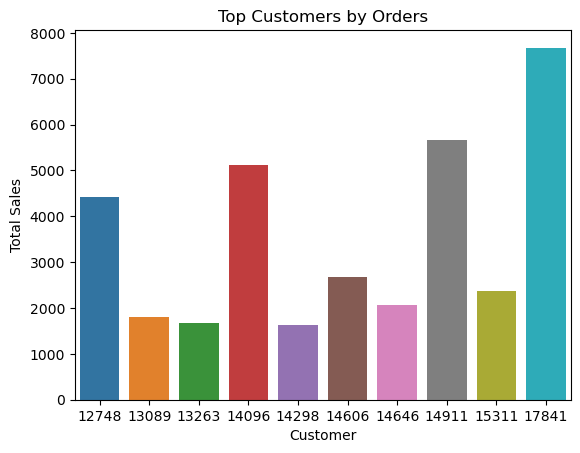

In [107]:
#top customers with highest sales
top_cusomers_sales = df.groupby(['CustomerID']).agg({'Total_Amount': 'sum', 'InvoiceNo':'count'}).rename(columns = {'Total_Amount':'Total Sales', 'InvoiceNo':'Number Of Orders'}).sort_values(by='Number Of Orders', ascending = False).head(10).reset_index()
print(top_cusomers_sales)
sns.barplot(data=top_cusomers_sales, x='CustomerID', y='Number Of Orders')
plt.title('Top Customers by Orders')
plt.xlabel('Customer')
plt.ylabel('Total Sales')
plt.show()

(array([3.92689e+05, 0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([1.00000000e-03, 1.68469609e+04, 3.36939208e+04, 5.05408807e+04,
        6.73878406e+04, 8.42348005e+04, 1.01081760e+05, 1.17928720e+05,
        1.34775680e+05, 1.51622640e+05, 1.68469600e+05]),
 <BarContainer object of 10 artists>)

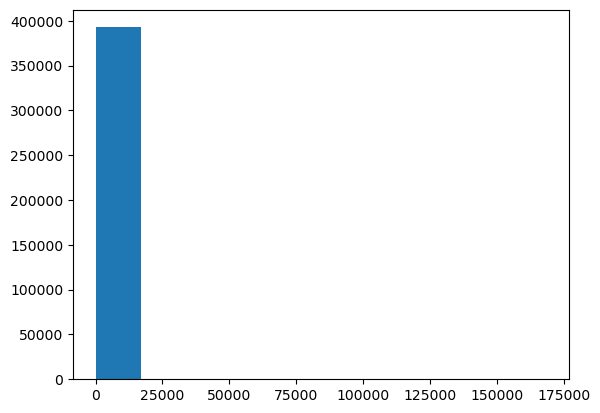

In [108]:
plt.hist(df['Total_Amount'])

In [109]:
# To make the Total_Amount column more symmetric
df['Log_Total_Amount'] = np.log1p(df['Total_Amount'])

(array([4.60480e+04, 1.28422e+05, 1.80530e+05, 2.87610e+04, 7.70600e+03,
        1.02800e+03, 1.87000e+02, 7.00000e+00, 1.00000e+00, 2.00000e+00]),
 array([9.99500333e-04, 1.20435120e+00, 2.40770291e+00, 3.61105461e+00,
        4.81440631e+00, 6.01775802e+00, 7.22110972e+00, 8.42446142e+00,
        9.62781313e+00, 1.08311648e+01, 1.20345165e+01]),
 <BarContainer object of 10 artists>)

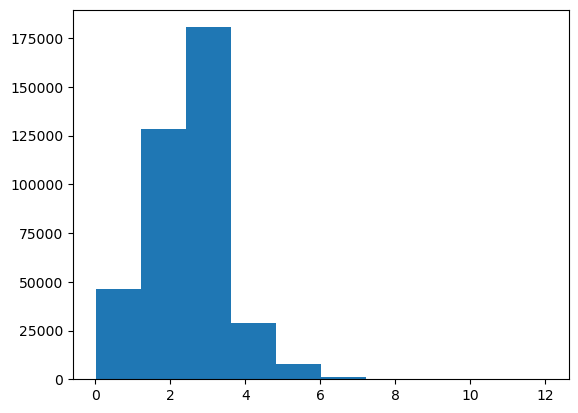

In [110]:
plt.hist(df['Log_Total_Amount'])

In [111]:
#Grouping the data by annual spending of each customer
annual_spending = df.groupby('CustomerID')['Total_Amount'].sum()

df = df.merge(annual_spending, on='CustomerID', suffixes=('', '_AnnualSpending'))
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,Day_Name,Hour,Total_Amount,Log_Total_Amount,Total_Amount_AnnualSpending
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010,12,2,Wednesday,8,15.30,2.791165,5391.21
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,2,Wednesday,8,20.34,3.060583,5391.21
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010,12,2,Wednesday,8,22.00,3.135494,5391.21
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,2,Wednesday,8,20.34,3.060583,5391.21
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,2,Wednesday,8,20.34,3.060583,5391.21


In [112]:
# Encoding categorical value
labelencoder = LabelEncoder()
df['Country_le'] = labelencoder.fit_transform(df['Country'])

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,Day_Name,Hour,Total_Amount,Log_Total_Amount,Total_Amount_AnnualSpending,Country_le
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010,12,2,Wednesday,8,15.30,2.791165,5391.21,35
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,2,Wednesday,8,20.34,3.060583,5391.21,35
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010,12,2,Wednesday,8,22.00,3.135494,5391.21,35
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,2,Wednesday,8,20.34,3.060583,5391.21,35
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,2,Wednesday,8,20.34,3.060583,5391.21,35


# Model Building

In [113]:
# Train Test Split

X = df[['Quantity','UnitPrice','Country_le','Year']]
y = df['Total_Amount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Linear Regression

In [114]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred_y_train = lr.predict(X_train)
lr_pred_y_test = lr.predict(X_test)

## DecisionTree Regressor

In [115]:
dt = DecisionTreeRegressor(random_state=10)
dt.fit(X_train, y_train)
dt_pred_y_train = dt.predict(X_train)
dt_pred_y_test = dt.predict(X_test)

## Random Forest Regressor

In [116]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train,y_train)
rf_pred_y_train = rf.predict(X_train)
rf_pred_y_test = rf.predict(X_test)

# Model Evaluation

## Linear Regression

In [117]:
print('Linear Regression Model Performance: \n')

print('------------------Training Performance:----------------')
print('Mean Absolute Error        :', mean_absolute_error(y_train, lr_pred_y_train))
print('Mean Squared Error         :', mean_squared_error(y_train, lr_pred_y_train))
print('Root Mean Squared Error    :', np.sqrt(mean_squared_error(y_train, lr_pred_y_train)))
print('R2 Score                   :', r2_score(y_train, lr_pred_y_train))

print('\n-----------------Testing Performance:-----------------')
print('Mean Absolute Error        :', mean_absolute_error(y_test, lr_pred_y_test))
print('Mean Squared Error         :', mean_squared_error(y_test, lr_pred_y_test))
print('Root Mean Squared Error    :', np.sqrt(mean_squared_error(y_test, lr_pred_y_test)))
print('R2 Score                   :', r2_score(y_test, lr_pred_y_test))

Linear Regression Model Performance: 

------------------Training Performance:----------------
Mean Absolute Error        : 12.465314442711922
Mean Squared Error         : 18201.07692720535
Root Mean Squared Error    : 134.9113669310535
R2 Score                   : 0.8477880907740805

-----------------Testing Performance:-----------------
Mean Absolute Error        : 12.120667678226544
Mean Squared Error         : 2928.7957749023603
Root Mean Squared Error    : 54.1183497060134
R2 Score                   : 0.47736537888261144


In [118]:
print('Decision Tree Regressor Model Performance: \n')

print('------------------Training Performance:----------------')
print('Mean Absolute Error        :', mean_absolute_error(y_train, dt_pred_y_train))
print('Mean Squared Error         :', mean_squared_error(y_train, dt_pred_y_train))
print('Root Mean Squared Error    :', np.sqrt(mean_squared_error(y_train, dt_pred_y_train)))
print('R2 Score                   :', r2_score(y_train, dt_pred_y_train))

print('\n-----------------Testing Performance:-----------------')
print('Mean Absolute Error        :', mean_absolute_error(y_test, dt_pred_y_test))
print('Mean Squared Error         :', mean_squared_error(y_test, dt_pred_y_test))
print('Root Mean Squared Error    :', np.sqrt(mean_squared_error(y_test, dt_pred_y_test)))
print('R2 Score                   :', r2_score(y_test, dt_pred_y_test))

Decision Tree Regressor Model Performance: 

------------------Training Performance:----------------
Mean Absolute Error        : 2.2769364809924896e-13
Mean Squared Error         : 2.4810515611644097e-25
Root Mean Squared Error    : 4.981015520116765e-13
R2 Score                   : 1.0

-----------------Testing Performance:-----------------
Mean Absolute Error        : 0.20390302906858804
Mean Squared Error         : 351.49072264480066
Root Mean Squared Error    : 18.74808583948774
R2 Score                   : 0.9372775588417849


In [119]:
print('Random Forest Regressor Model Performance: \n')

print('------------------Training Performance:----------------')
print('Mean Absolute Error        :', mean_absolute_error(y_train, rf_pred_y_train))
print('Mean Squared Error         :', mean_squared_error(y_train, rf_pred_y_train))
print('Root Mean Squared Error    :', np.sqrt(mean_squared_error(y_train, rf_pred_y_train)))
print('R2 Score                   :', r2_score(y_train, rf_pred_y_train))

print('\n-----------------Testing Performance:-----------------')
print('Mean Absolute Error        :', mean_absolute_error(y_test, rf_pred_y_test))
print('Mean Squared Error         :', mean_squared_error(y_test, rf_pred_y_test))
print('Root Mean Squared Error    :', np.sqrt(mean_squared_error(y_test, rf_pred_y_test)))
print('R2 Score                   :', r2_score(y_test, rf_pred_y_test))

Random Forest Regressor Model Performance: 

------------------Training Performance:----------------
Mean Absolute Error        : 0.31021432544025873
Mean Squared Error         : 8476.42609059964
Root Mean Squared Error    : 92.06750833274266
R2 Score                   : 0.9291133703888657

-----------------Testing Performance:-----------------
Mean Absolute Error        : 0.17531838195047475
Mean Squared Error         : 278.3069097002015
Root Mean Squared Error    : 16.68253307205478
R2 Score                   : 0.9503369857495901


In [120]:
print('Accuracy on Training set:')
output_train = pd.DataFrame({'Model':['Linear Regressor','Decision Tree Regressor','Random Forest Regressor'], 'Accuracy':[r2_score(y_train, lr_pred_y_train)*100, r2_score(y_train, dt_pred_y_train)*100, r2_score(y_train, rf_pred_y_train)*100]})
output_train

Accuracy on Training set:


,Model,Accuracy
0,Linear Regressor,84.778809
1,Decision Tree Regressor,100.000000
2,Random Forest Regressor,92.911337


In [121]:
print('Accuracy on Testing set:')
output_test = pd.DataFrame({'Model':['Linear Regressor','Decision Tree Regressor','Random Forest Regressor'], 'Accuracy':[r2_score(y_test, lr_pred_y_test)*100, r2_score(y_test, dt_pred_y_test)*100, r2_score(y_test, rf_pred_y_test)*100]})
output_test

Accuracy on Testing set:


,Model,Accuracy
0,Linear Regressor,47.736538
1,Decision Tree Regressor,93.727756
2,Random Forest Regressor,95.033699


# Customer segmentation using clustering

In [122]:
# Get the most recent date from the 'InvoiceDate' column
most_recent_date = df['InvoiceDate'].max()

# Calculate Recency based on the most recent date
rfm_data = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (most_recent_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'Total_Amount': 'sum'
})
rfm_data.rename(columns = {
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'Total_Amount': 'MonetaryValue'
}, inplace = True)


In [123]:
rfm_data.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346,325,1,77183.60
12347,1,7,4310.00
12348,74,4,1797.24
12349,18,1,1757.55
12350,309,1,334.40


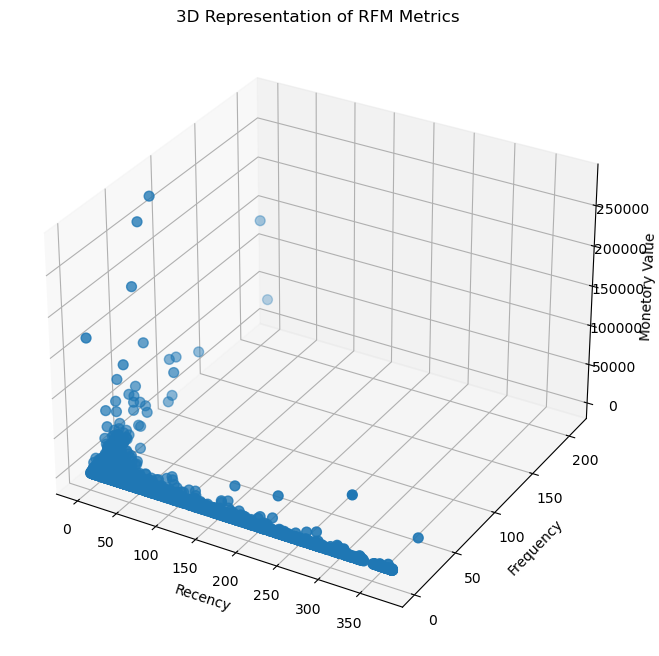

In [124]:
# Plotting a 3D representation of rfm_data
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection = '3d')

ax.scatter(rfm_data['Recency'], rfm_data['Frequency'], rfm_data['MonetaryValue'], s = 50)
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetory Value')
ax.set_title('3D Representation of RFM Metrics')
plt.show()

In [125]:
# Standardize the RFM metrics
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_data)

In [126]:
# checking the best value of k value from 1 to 10
inertia_values = []
k_range = range(1,11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    inertia_values.append(kmeans.inertia_)

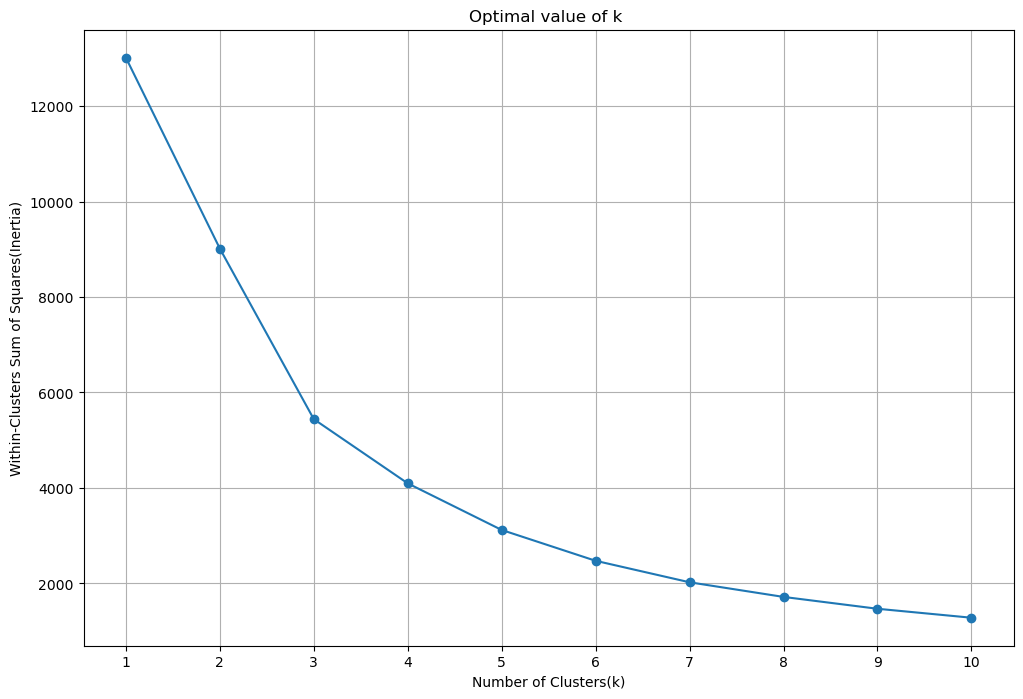

In [127]:
plt.figure(figsize=(12,8))
plt.plot(k_range, inertia_values, marker='o')
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Within-Clusters Sum of Squares(Inertia)')
plt.title('Optimal value of k ')
plt.xticks(k_range)
plt.grid(True)
plt.show()

In [128]:
# Applying K-Means clustring to create clusters based on RFM metrics
kmeans = KMeans(n_clusters=4, random_state=42)
rfm_data['KMeans_Cluster'] = kmeans.fit_predict(rfm_scaled)

In [129]:
print("K-Means Clustering\n")
print(rfm_data['KMeans_Cluster'].value_counts())

K-Means Clustering

0    3054
1    1067
3     204
2      13
Name: KMeans_Cluster, dtype: int64


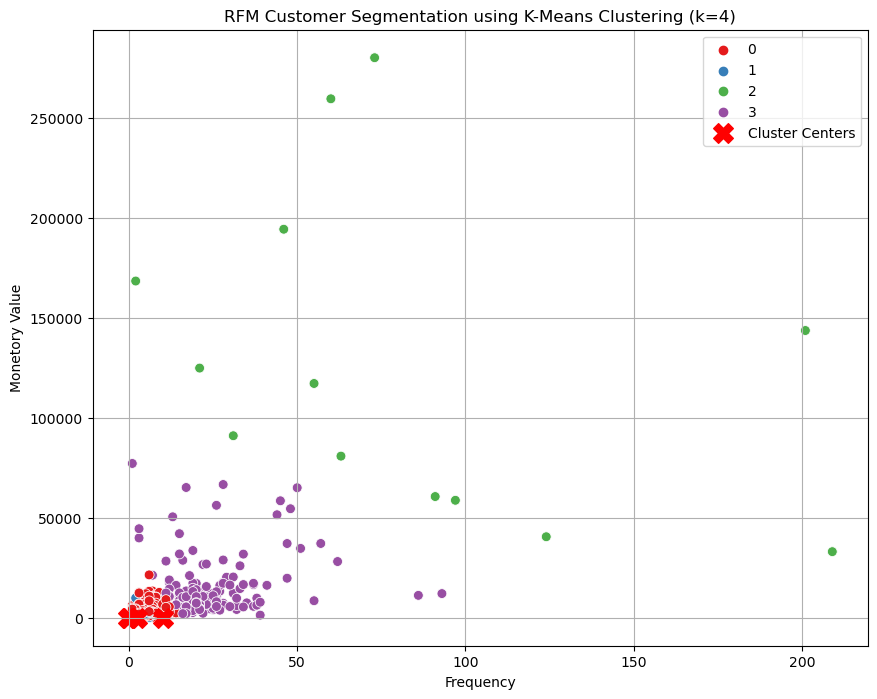

In [130]:
# Plotting the clustered group of data in a scatter plot

plt.figure(figsize=(10,8))
sns.scatterplot(data=rfm_data, x='Frequency', y='MonetaryValue', hue='KMeans_Cluster', palette='Set1', s=50)
plt.scatter(kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,2],c='red',marker='X',s=200,label='Cluster Centers')
plt.xlabel('Frequency')
plt.ylabel('Monetory Value')
plt.title('RFM Customer Segmentation using K-Means Clustering (k=4)')
plt.legend()
plt.grid(True)
plt.show()

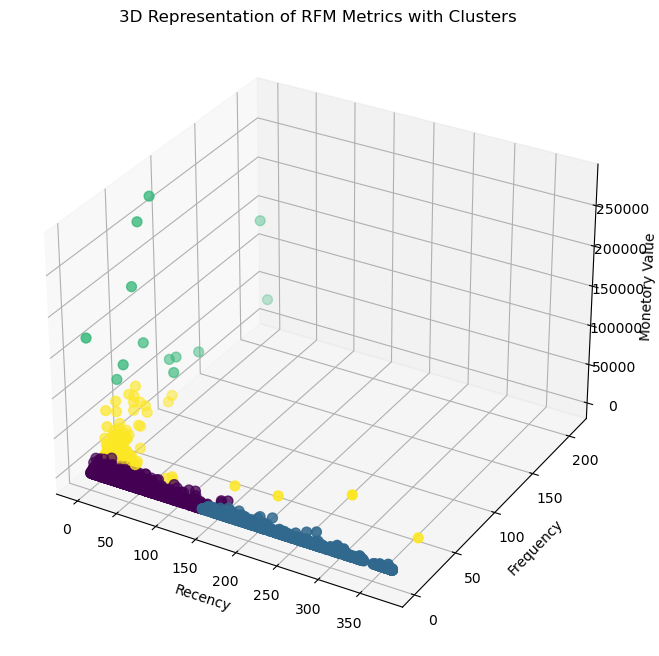

In [131]:

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111,projection='3d')

ax.scatter(rfm_data['Recency'], rfm_data['Frequency'], rfm_data['MonetaryValue'], c=rfm_data['KMeans_Cluster'], s=50)
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetory Value')
ax.set_title('3D Representation of RFM Metrics with Clusters')
plt.show()

In [132]:
# Apply Agglomerative Hierarchical Clustering
agg_clustering = AgglomerativeClustering(n_clusters=4)
rfm_data['Agg_Cluster'] = agg_clustering.fit_predict(rfm_scaled)

In [133]:
print('\nAgglomerative Hierarchical Clustering')
print(rfm_data['Agg_Cluster'].value_counts())


Agglomerative Hierarchical Clustering
1    3042
2    1134
3     147
0      15
Name: Agg_Cluster, dtype: int64


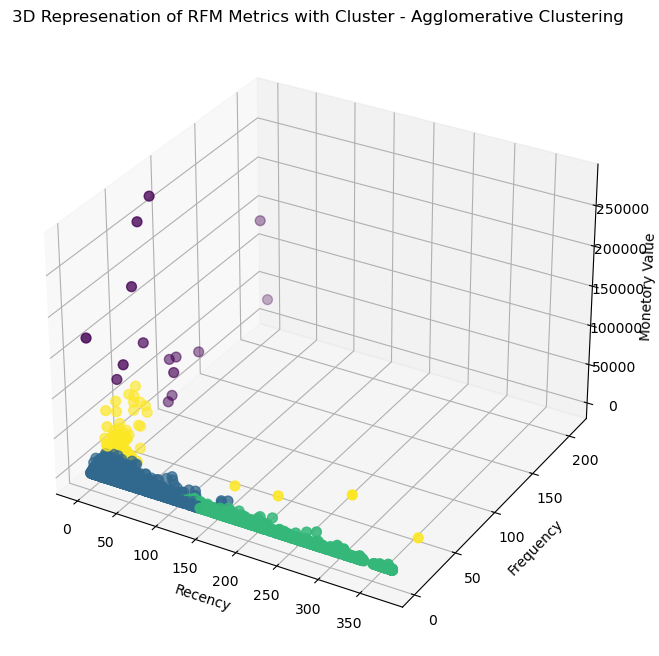

In [134]:
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(rfm_data['Recency'], rfm_data['Frequency'], rfm_data['MonetaryValue'], c=rfm_data['Agg_Cluster'], s=50)
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetory Value')
ax.set_title('3D Represenation of RFM Metrics with Cluster - Agglomerative Clustering')
plt.show()

# Interpretation of Results

## Low-Recency, Low-Frequency, Low-Monetary
* These customers have low Recency, which means they have purchased recently.
* They also have low Frequency and low Monetary Value, which means they have spent little money and only made few purchases.
* They fall in the category of customers who made recent small purchases. To attract these customers for further purchases and ultimately to be a loyal customer, we can provide them with offers or coupons.


## High-Recency, Low-Frequency, Low-Monetary
* These customers have High Recency which means they have been inactive for quite a sometime and not made any recent purchases.
* The purchases that they made before were of low monetary value that means they purchased less than other customers.
* Since the frequency is low, we can say that they were not the loyal or frequent customers. So, we can say that they come in a category of customers who have made small purchases before and now they are inactive.


## Low-Recency, High-Frequency, High-Monetary
* These Customers have High Frequency, High Monetary and Low Recency, it means that they are the customers who have made frequent purchases with high value products.
* We can say that these people come in the category of loyal customers who purchase high value products and can be termed as major source of income for the company.


## High-Recency, High-Frequency, High-Monetary
* These customers have High Frequency and High Monetary, it means they are the customers who purchase frequently in a high monetary value.
* They have High Recency which indicates that they have not purchased anything recently.
* We can say that, they are the customers who come into loyal customers category, who have made high monetary purchases frequently but haven't purchased anything in recent past. So, to attract them more, they should be offered frequent customized offers to keep them around.